In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from qutip import *
import scipy.optimize
from matplotlib import pyplot as plt

import cavity_qed_systems
import pulse
import cmps_utils
import tncontract as tn
import parameterized_pulse as ppulse

In [2]:
def optimize_overlap(state, target_mps, pulse):
    """Right now we assume that there is only one pulse."""
    def _obj_fun(x):
        pulse.update(x)
        olap = np.abs(state.get_inner_product(target_mps, [pulse]))**2
        print("Current overlap = ", olap)
        return -olap
    
    def _gradient(x):
        pulse.update(x)
        inner_prod = state.get_inner_product(target_mps, [pulse])
        grad_inner_prod = state.get_inner_prod_gradient(
            target_mps, [pulse])[0]
        grad = -2 * pulse.get_gradient(state.times) @ np.real(
            grad_inner_prod * np.conj(inner_prod))
        #print(np.shape(grad))
        return grad.astype(float)

    print(pulse.bounds())
    print(np.shape(pulse.state()))
    scipy.optimize.minimize(
        _obj_fun, pulse.state(), bounds=pulse.bounds(),jac=_gradient, method="L-BFGS-B") # jac=_gradient,

[[-2.  2.]
 [-2.  2.]
 [-2.  2.]
 ...
 [-2.  2.]
 [-2.  2.]
 [-2.  2.]]
(501,)
Current overlap =  0.000503748262677301


<ipython-input-2-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.0005037716923657246
Current overlap =  0.0005037951242622851
Current overlap =  0.000503888863436829
Current overlap =  0.0005042640055835123
Current overlap =  0.000505767543642357
Current overlap =  0.0005118293548997099
Current overlap =  0.0005368487042061355
Current overlap =  0.0005919030017011924
Current overlap =  0.0005919369210118012
Current overlap =  0.0005920726316897323
Current overlap =  0.0005926160095587447
Current overlap =  0.0005947980956682668
Current overlap =  0.0006036644097374031
Current overlap =  0.0006275004680891552
Current overlap =  0.0006275415884137538
Current overlap =  0.0006277061169516467
Current overlap =  0.000628364987232121
Current overlap =  0.0006310125853570174
Current overlap =  0.0006417980618423219
Current overlap =  0.0006881386153946958
Current overlap =  0.0007686378806291279
Current overlap =  0.0007687138690232823
Current overlap =  0.0007690179411052331
Current overlap =  0.000770236126481899
Current overlap =  0

Current overlap =  0.0186066156405596
Current overlap =  0.0186325551748295
Current overlap =  0.018736540100495483
Current overlap =  0.0191560978521187
Current overlap =  0.020610552480379622
Current overlap =  0.02063995666397812
Current overlap =  0.02075782270126167
Current overlap =  0.020821984746896373
Current overlap =  0.020851675172313292
Current overlap =  0.02086779452184893
Current overlap =  0.0208972823336283
Current overlap =  0.021015480205222505
Current overlap =  0.02149219965929182
Current overlap =  0.021653768225357074
Current overlap =  0.02168445022457902
Current overlap =  0.021691730416476773
Current overlap =  0.021722157488364074
Current overlap =  0.021844111453247366
Current overlap =  0.02233583758338575
Current overlap =  0.024363877336603283
Current overlap =  0.02534388643609329
Current overlap =  0.025379882837676043
Current overlap =  0.025524133976342032
Current overlap =  0.02610535081621703
Current overlap =  0.027284189167266833
Current overlap 

Current overlap =  0.11589419303718462
Current overlap =  0.12104967566373663
Current overlap =  0.12380426341792343
Current overlap =  0.12389055545032043
Current overlap =  0.12423610795480648
Current overlap =  0.12502495364865873
Current overlap =  0.12511158515597115
Current overlap =  0.12544524196829518
Current overlap =  0.12553147205750897
Current overlap =  0.12587675987478428
Current overlap =  0.12605182826317093
Current overlap =  0.12613684522336638
Current overlap =  0.12647726399251347
Current overlap =  0.12746212926469994
Current overlap =  0.12754688228058533
Current overlap =  0.12788622863711205
Current overlap =  0.12924887503989818
Current overlap =  0.12945902706621001
Current overlap =  0.1295444331873403
Current overlap =  0.12988637741025627
Current overlap =  0.13125917537167017
Current overlap =  0.13408960150592725
Current overlap =  0.13417655378800017
Current overlap =  0.1345246550855508
Current overlap =  0.1359216295042307
Current overlap =  0.1360315

<ipython-input-2-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.0006175166816719832
Current overlap =  0.0006176702753412984
Current overlap =  0.00061828499239395
Current overlap =  0.0006207493430623608
Current overlap =  0.0006306947507980439
Current overlap =  0.0006719029574304486
Current overlap =  0.0008092947234127815
Current overlap =  0.000809539931693698
Current overlap =  0.0008105214793741801
Current overlap =  0.0008144591158592201
Current overlap =  0.0008303936184073121
Current overlap =  0.0008971281302802358
Current overlap =  0.0011903222898228634
Current overlap =  0.0011908323213536784
Current overlap =  0.0011928744859640156
Current overlap =  0.001201075811846242
Current overlap =  0.0012344071038227914
Current overlap =  0.001376360796356975
Current overlap =  0.0014044659286192311
Current overlap =  0.001405159464393954
Current overlap =  0.001407936714696552
Current overlap =  0.0014190955192669654
Current overlap =  0.0014645332333412403
Current overlap =  0.001578562345663187
Current overlap =  0.001

Current overlap =  0.039743778083009704
Current overlap =  0.041107887272578435
Current overlap =  0.04325387051173361
Current overlap =  0.043348202538047255
Current overlap =  0.043726760418000096
Current overlap =  0.045164502633786484
Current overlap =  0.04526263466803219
Current overlap =  0.045327697002173574
Current overlap =  0.04542323855220776
Current overlap =  0.04580656332260486
Current overlap =  0.046567404694588095
Current overlap =  0.046665685492519406
Current overlap =  0.04705996344797833
Current overlap =  0.04711752502306772
Current overlap =  0.04721699336044966
Current overlap =  0.04761601987758951
Current overlap =  0.04873917336884375
Current overlap =  0.04884150389452356
Current overlap =  0.049251956717553745
Current overlap =  0.04985867493499489
Current overlap =  0.049963396874774725
Current overlap =  0.05038340903630649
Current overlap =  0.052081055747911005
Current overlap =  0.05226156244728639
Current overlap =  0.052371318968085126
Current overl

Current overlap =  0.0005734210352391139


<ipython-input-2-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.0005734571592701972
Current overlap =  0.0005734932891953129
Current overlap =  0.0005736378403459193
Current overlap =  0.0005742165479606732
Current overlap =  0.0005765394144647765
Current overlap =  0.0005859586801351549
Current overlap =  0.0006256309790237451
Current overlap =  0.0007419002573254463
Current overlap =  0.0007419745098118077
Current overlap =  0.0007422716750190645
Current overlap =  0.0007434628207308436
Current overlap =  0.0007482672062065839
Current overlap =  0.0007681244636392865
Current overlap =  0.0008579787245563463
Current overlap =  0.0008933155155152443
Current overlap =  0.0008934561503348694
Current overlap =  0.0008940190586889656
Current overlap =  0.0008962766007551991
Current overlap =  0.0009054015280657598
Current overlap =  0.0009104834542553921
Current overlap =  0.000910632593361499
Current overlap =  0.0009112295490958162
Current overlap =  0.0009136237649170756
Current overlap =  0.0009233031661825971
Current overlap =

Current overlap =  0.03096955528017367
Current overlap =  0.03113731060320828
Current overlap =  0.031148666005637315
Current overlap =  0.031190660092887967
Current overlap =  0.03128122801565033
Current overlap =  0.031323178099487835
Current overlap =  0.031491326159768435
Current overlap =  0.03216946934461866
Current overlap =  0.0349699218158997
Current overlap =  0.035356415763118106
Current overlap =  0.03540464011636672
Current overlap =  0.03559793931104032
Current overlap =  0.03637754569794056
Current overlap =  0.036553547076335687
Current overlap =  0.036603578977576844
Current overlap =  0.03674918473174221
Current overlap =  0.03679942051172808
Current overlap =  0.037000778038149246
Current overlap =  0.0378128160395074
Current overlap =  0.038651118675239106
Current overlap =  0.03870351450341291
Current overlap =  0.03891352254774766
Current overlap =  0.03976032381572117
Current overlap =  0.04025673767135319
Current overlap =  0.04031159511753024
Current overlap = 

Current overlap =  0.14757360000632747
Current overlap =  0.1480456094215455
Current overlap =  0.1480510708992963
Current overlap =  0.14816881574016852
Current overlap =  0.14842701840697065
Current overlap =  0.14854429339351005
Current overlap =  0.149013472570773
Current overlap =  0.15006588586494868
Current overlap =  0.15018249104233708
Current overlap =  0.1506489626168482
Current overlap =  0.1511198955488398
Current overlap =  0.15123598043552758
Current overlap =  0.15170034949156824
Current overlap =  0.15355804405323956
Current overlap =  0.1555250237819762
Current overlap =  0.15564042811397663
Current overlap =  0.15566817214010834
Current overlap =  0.18468957598186755
Current overlap =  0.21914785144807455
Current overlap =  0.23349232027504316
Current overlap =  0.2406720972572758
Current overlap =  0.25050069045041923
Current overlap =  0.2577537392472761
Current overlap =  0.2652952809547245
Current overlap =  0.2750992122134063
Current overlap =  0.278620199148306

<ipython-input-2-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.0009152721372010471
Current overlap =  0.0009157439995414627
Current overlap =  0.0009176333720450227
Current overlap =  0.0009243935759263407
Current overlap =  0.0009248722963330787
Current overlap =  0.000926789137234046
Current overlap =  0.0009344878834940071
Current overlap =  0.0009657871837606202
Current overlap =  0.0010722711215381687
Current overlap =  0.0010728626161117423
Current overlap =  0.0010752311626568297
Current overlap =  0.0010847464901622185
Current overlap =  0.0011234692128157418
Current overlap =  0.0012518213481583751
Current overlap =  0.0012525717196366928
Current overlap =  0.0012555767414913733
Current overlap =  0.0012676534804883165
Current overlap =  0.0013168717457233607
Current overlap =  0.001528634422075642
Current overlap =  0.0017405482167447022
Current overlap =  0.0017417876910149543
Current overlap =  0.0017467524258914585
Current overlap =  0.0017667209483215598
Current overlap =  0.0018483596983118742
Current overlap = 

Current overlap =  0.035185975498791426
Current overlap =  0.03523948260293817
Current overlap =  0.035453807322223155
Current overlap =  0.03631570678736711
Current overlap =  0.03670743733092846
Current overlap =  0.036762148152350654
Current overlap =  0.03698126616823443
Current overlap =  0.037801467139075395
Current overlap =  0.03785642929833721
Current overlap =  0.03807653527844696
Current overlap =  0.03862992425048813
Current overlap =  0.03868508971503534
Current overlap =  0.03890598909376939
Current overlap =  0.03899044107409478
Current overlap =  0.03904562446909571
Current overlap =  0.03926658832576458
Current overlap =  0.040153976307816766
Current overlap =  0.04080333429282858
Current overlap =  0.04085998410014929
Current overlap =  0.041001628004799465
Current overlap =  0.04105724432658897
Current overlap =  0.04127989688832411
Current overlap =  0.04217334798387373
Current overlap =  0.0424095317519516
Current overlap =  0.042466007216095766
Current overlap =  

<ipython-input-2-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.0004871018137641754
Current overlap =  0.00048722452439258683
Current overlap =  0.0004877154455278699
Current overlap =  0.0004896803804134651
Current overlap =  0.000497559641632307
Current overlap =  0.000529358771362641
Current overlap =  0.0006204886503387965
Current overlap =  0.0006206227595127481
Current overlap =  0.0006211593114804436
Current overlap =  0.0006233073599131974
Current overlap =  0.0006319287632117224
Current overlap =  0.0006668671786257257
Current overlap =  0.0008131337949313063
Current overlap =  0.0008769032945951157
Current overlap =  0.000877090371109378
Current overlap =  0.0008778390623377504
Current overlap =  0.0008808399951366995
Current overlap =  0.000892942745429468
Current overlap =  0.0009429602818805606
Current overlap =  0.0009867051220881055
Current overlap =  0.000986935371556257
Current overlap =  0.0009878569407716087
Current overlap =  0.000991552368919046
Current overlap =  0.0010037835242125797
Current overlap =  0.

Current overlap =  0.03598730922604057
Current overlap =  0.03601694083941773
Current overlap =  0.03604855740226364
Current overlap =  0.03617528349276764
Current overlap =  0.036207488384078876
Current overlap =  0.036239306034569145
Current overlap =  0.03636683919684818
Current overlap =  0.03688118465226165
Current overlap =  0.039006686643746305
Current overlap =  0.040122916786138586
Current overlap =  0.04016144624839492
Current overlap =  0.04031592080074675
Current overlap =  0.0408126350652789
Current overlap =  0.040852078969178696
Current overlap =  0.04101022136968175
Current overlap =  0.041648672817307955
Current overlap =  0.043471757346692834
Current overlap =  0.04351600038803473
Current overlap =  0.04369340550540152
Current overlap =  0.04414800565073795
Current overlap =  0.04419335415822523
Current overlap =  0.044375195953677164
Current overlap =  0.04510973765870166
Current overlap =  0.045558129585506486
Current overlap =  0.0456057540248751
Current overlap = 

Current overlap =  0.26917747682139365
Current overlap =  0.269179660645141
Current overlap =  0.26918006416509704
Current overlap =  0.26918013893245435
Current overlap =  0.2691801527930831
Current overlap =  0.26918015536285916
Current overlap =  0.2691801558393083
Current overlap =  0.2691801559276436
Current overlap =  0.26918015594402134
Current overlap =  0.26918015594705785
Current overlap =  0.2691801559476219
Current overlap =  0.269180155947725
Current overlap =  0.26918015594774425
Current overlap =  0.2691801559477491
Current overlap =  0.2691801559477495
Current overlap =  0.26918015594774886
Current overlap =  0.2691801559477492
Current overlap =  0.2691806716231011
Current overlap =  0.26918270929507104
Current overlap =  0.26919045937740943
Current overlap =  0.2691976934759925
Current overlap =  0.26920598523432837
Current overlap =  0.26898540716047675
Current overlap =  0.2691797966445425
Current overlap =  0.2692017419074646
Current overlap =  0.2692052415973293
Cu

<ipython-input-2-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.0021275083898929844
Current overlap =  0.0021278983473959215
Current overlap =  0.0021294583193009788
Current overlap =  0.002135700468404464
Current overlap =  0.0021607046848112696
Current overlap =  0.0022612554084411015
Current overlap =  0.002655014642014234
Current overlap =  0.002655571280877681
Current overlap =  0.0026578000082943675
Current overlap =  0.0026667496988018414
Current overlap =  0.0027031068387650863
Current overlap =  0.002857590129188792
Current overlap =  0.0030510690033390213
Current overlap =  0.0030519496201644146
Current overlap =  0.0030554760653248784
Current overlap =  0.0030696455614372146
Current overlap =  0.0031273474532663567
Current overlap =  0.0031293482990327665
Current overlap =  0.003130276813976979
Current overlap =  0.0031339950306889237
Current overlap =  0.003148934481266395
Current overlap =  0.0031738389605908694
Current overlap =  0.0031748072768407495
Current overlap =  0.0031786849239245378
Current overlap =  0.0

Current overlap =  0.03213464700102879
Current overlap =  0.03225071308857061
Current overlap =  0.03271697720507581
Current overlap =  0.03301426743267162
Current overlap =  0.033043896246337086
Current overlap =  0.03316253636386752
Current overlap =  0.03363907207924871
Current overlap =  0.035575312175249806
Current overlap =  0.03910543323218937
Current overlap =  0.039138856012246086
Current overlap =  0.0392726627513778
Current overlap =  0.03980970913095111
Current overlap =  0.04097462013594311
Current overlap =  0.04100899905807531
Current overlap =  0.04114662426663401
Current overlap =  0.041698844785495
Current overlap =  0.043933084826291824
Current overlap =  0.044827286294229864
Current overlap =  0.04486377944223609
Current overlap =  0.045009850731520876
Current overlap =  0.045595678338406886
Current overlap =  0.04591843626533661
Current overlap =  0.0459553989841475
Current overlap =  0.04610334380546282
Current overlap =  0.04623818871978561
Current overlap =  0.0

Current overlap =  0.2473032800454385
Current overlap =  0.2473768066452455
Current overlap =  0.24735542273138794
Current overlap =  0.2473749251402395
Current overlap =  0.24737652511621713
Current overlap =  0.2473768066452455
Current overlap =  0.24704760285177504
Current overlap =  0.24733119128081396
Current overlap =  0.24736899963462528
Current overlap =  0.24737534019128352
Current overlap =  0.24737652513748334
Current overlap =  0.24737675236943604
Current overlap =  0.2473767961717763
Current overlap =  0.24737680462387435
Current overlap =  0.24737680625511038
Current overlap =  0.24737680656994773
Current overlap =  0.24737680663071232
Current overlap =  0.24737680664244036
Current overlap =  0.24737680664470452
Current overlap =  0.2473768066451407
Current overlap =  0.24737680664522568
Current overlap =  0.24737680664524142
Current overlap =  0.24737680664524478
Current overlap =  0.24737680664524594
Current overlap =  0.24737680664524556
Current overlap =  0.2473768066

Current overlap =  0.2477670945173308
Current overlap =  0.24776709451986575
Current overlap =  0.2477670945203324
Current overlap =  0.2477670945204189
Current overlap =  0.24776709452043463
Current overlap =  0.24776709452043785
Current overlap =  0.24776709452043819
Current overlap =  0.24776709452043763
Current overlap =  0.2477670945204386
Current overlap =  0.24776774164563048
Current overlap =  0.24777030122754923
Current overlap =  0.24777947370852382
Current overlap =  0.24784163072406415
Current overlap =  0.2477857442409384
Current overlap =  0.24783823162711044
Current overlap =  0.247841251850145
Current overlap =  0.24784156605669666
Current overlap =  0.24784161794734938
Current overlap =  0.24784162811031946
Current overlap =  0.24784163018538818
Current overlap =  0.24784163061287517
Current overlap =  0.24784163070110674
Current overlap =  0.24784163071932344
Current overlap =  0.2478416307230854
Current overlap =  0.24784163072386228
Current overlap =  0.247841630724

<ipython-input-2-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.001331121927687378
Current overlap =  0.0018902588691847386
Current overlap =  0.0023139637626767634
Current overlap =  0.008236656311562122
Current overlap =  0.023688432562611658
Current overlap =  0.026072545374991006
Current overlap =  0.0348984822318238
Current overlap =  0.04564015004282618
Current overlap =  0.0607375647829086
Current overlap =  0.07091616212827015
Current overlap =  0.08204381608611325
Current overlap =  0.10035410894961798
Current overlap =  0.1132142637983551
Current overlap =  0.1345132785438733
Current overlap =  0.1386856218499305
Current overlap =  0.1433781634333056
Current overlap =  0.14638325759462234
Current overlap =  0.1538502557288171
Current overlap =  0.15648515188062173
Current overlap =  0.15775066338209445
Current overlap =  0.15998073892440454
Current overlap =  0.16179896504978275
Current overlap =  0.1624315501402848
Current overlap =  0.16301931181622803
Current overlap =  0.16394878813916444
Current overlap =  0.1653

<ipython-input-2-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.004414275013059333
Current overlap =  0.006096341452665026
Current overlap =  0.006600683090988682
Current overlap =  0.008051843693162737
Current overlap =  0.012041712606089433
Current overlap =  0.018217593172464155
Current overlap =  0.02921597340129328
Current overlap =  0.04882989604052062
Current overlap =  0.06777448351141922
Current overlap =  0.08047430461631748
Current overlap =  0.08751135658681584
Current overlap =  0.09576266746669508
Current overlap =  0.10393483187675709
Current overlap =  0.10943987935937989
Current overlap =  0.11312515832748347
Current overlap =  0.11661671519678814
Current overlap =  0.1187125852039195
Current overlap =  0.13215197316917468
Current overlap =  0.1376464520391279
Current overlap =  0.14240763932462092
Current overlap =  0.14645159073811365
Current overlap =  0.15038051797513285
Current overlap =  0.1527764241675417
Current overlap =  0.15892734305251985
Current overlap =  0.1604169781557341
Current overlap =  0.16

Current overlap =  0.18368222092385203
Current overlap =  0.1837474439728281
Current overlap =  0.18375102932015921
Current overlap =  0.1837512981368068
Current overlap =  0.18375133281887407
Current overlap =  0.18375133914672243
Current overlap =  0.1837513404360208
Current overlap =  0.18375134070561988
Current overlap =  0.18375134076231053
Current overlap =  0.1837513407742455
Current overlap =  0.1837513407767591
Current overlap =  0.1837513407772884
Current overlap =  0.1837513407774001
Current overlap =  0.18375134077742353
Current overlap =  0.18375134077742833
Current overlap =  0.18375134077743027
Current overlap =  0.18375134077742875
Current overlap =  0.18375134077742988
Current overlap =  0.18375134077742966
Current overlap =  0.18375358845859602
Current overlap =  0.18376252351376257
Current overlap =  0.18379737311971558
Current overlap =  0.18392252869482653
Current overlap =  0.18424876401602902
Current overlap =  0.1841279942647116
Current overlap =  0.184237162729

<ipython-input-2-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.01150570904244542
Current overlap =  0.013617814849974316
Current overlap =  0.01486294382366514
Current overlap =  0.011753404164463311
Current overlap =  0.016098210801479707
Current overlap =  0.017155178800928834
Current overlap =  0.020597441796589237
Current overlap =  0.02387445332886554
Current overlap =  0.013607173043639944
Current overlap =  0.029524671023731304
Current overlap =  0.03540236544662425
Current overlap =  0.043389442015029714
Current overlap =  0.05972982540501939
Current overlap =  0.07274991008549861
Current overlap =  0.060525832042849136
Current overlap =  0.07687784758001713
Current overlap =  0.08570385788653151
Current overlap =  0.09735600528531992
Current overlap =  0.10818395671554629
Current overlap =  0.11858286105425785
Current overlap =  0.12384801989645802
Current overlap =  0.12536107096798263
Current overlap =  0.13012314870664002
Current overlap =  0.13315434515105798
Current overlap =  0.13547852551973316
Current overlap 

Current overlap =  0.15088484408769653
Current overlap =  0.15088484408769595
Current overlap =  0.15088484408769612
Current overlap =  0.15088484408769595
Current overlap =  0.15088496315070446
Current overlap =  0.1508854287924943
Current overlap =  0.15083871080144973
Current overlap =  0.15088221438008662
Current overlap =  0.15088503272407333
Current overlap =  0.15088535811240106
Current overlap =  0.1508854145936519
Current overlap =  0.15088542586021222
Current overlap =  0.15088542818335204
Current overlap =  0.15088542866579752
Current overlap =  0.15088542876613614
Current overlap =  0.15088542878701053
Current overlap =  0.15088542879135372
Current overlap =  0.15088542879225728
Current overlap =  0.15088542879244526
Current overlap =  0.1508854287924843
Current overlap =  0.1508854287924925
Current overlap =  0.1508854287924943
Current overlap =  0.1508854287924946
Current overlap =  0.15088542879249472
Current overlap =  0.15088542879249378
Current overlap =  0.1508854287

<ipython-input-2-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.03834542812999211
Current overlap =  0.038354581146267185
Current overlap =  0.0383912877779357
Current overlap =  0.03846710555043111
Current overlap =  0.038476486337282234
Current overlap =  0.038514109548587756
Current overlap =  0.03854289510527759
Current overlap =  0.038552425641738
Current overlap =  0.03859065093034116
Current overlap =  0.03874518850407664
Current overlap =  0.039232588976372496
Current overlap =  0.03924360867548918
Current overlap =  0.03928781943297652
Current overlap =  0.03946675354414779
Current overlap =  0.039654750136852046
Current overlap =  0.03966674699235605
Current overlap =  0.039714881812715666
Current overlap =  0.03990975427889812
Current overlap =  0.04043209082683518
Current overlap =  0.040445958996057164
Current overlap =  0.04050160193442004
Current overlap =  0.04064806562309213
Current overlap =  0.04066233440326258
Current overlap =  0.04071957870150054
Current overlap =  0.040951225382965334
Current overlap =  0

<ipython-input-2-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.20859118415499558
Current overlap =  0.24091469876113394
Current overlap =  0.2482371685766875
Current overlap =  0.25293399866210936
Current overlap =  0.26006287421428953
Current overlap =  0.2664205987116601
Current overlap =  0.27561214960753483
Current overlap =  0.28477280495450286
Current overlap =  0.2946846908914772
Current overlap =  0.3004395670067344
Current overlap =  0.3129652003489818
Current overlap =  0.3181618056725692
Current overlap =  0.3251192791666136
Current overlap =  0.3298261442147273
Current overlap =  0.3350565668550782
Current overlap =  0.33741194494233523
Current overlap =  0.33944722382491666
Current overlap =  0.3409015692482733
Current overlap =  0.34292435529680987
Current overlap =  0.3476732066056673
Current overlap =  0.34937213902306047
Current overlap =  0.35185157584014165
Current overlap =  0.35268760987544373
Current overlap =  0.35365301521145953
Current overlap =  0.3546252699459767
Current overlap =  0.356078938749173


<ipython-input-2-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.5347528986057104
Current overlap =  0.5803452677600244
Current overlap =  0.5917833127798231
Current overlap =  0.5939351872800885
Current overlap =  0.596774183020891
Current overlap =  0.600232765025824
Current overlap =  0.6067764648412295
Current overlap =  0.6203738766722737
Current overlap =  0.6337535853001321
Current overlap =  0.6407297202699053
Current overlap =  0.6502702577360844
Current overlap =  0.6585013227114002
Current overlap =  0.6657387903529021
Current overlap =  0.6689153344227962
Current overlap =  0.6699061499190397
Current overlap =  0.6747428342448424
Current overlap =  0.6819276462256063
Current overlap =  0.6874779780693139
Current overlap =  0.6918654434084156
Current overlap =  0.6951542136882582
Current overlap =  0.696888901694191
Current overlap =  0.6968445097526957
Current overlap =  0.6982367674440233
Current overlap =  0.6929939716056936
Current overlap =  0.698406157030005
Current overlap =  0.6962885584554733
Current overlap 

<ipython-input-2-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.8703650219505156
Current overlap =  0.9129144166067074
Current overlap =  0.9179602519046715
Current overlap =  0.9289487746704035
Current overlap =  0.9228464214627845
Current overlap =  0.9299406276856486
Current overlap =  0.930194126899759
Current overlap =  0.929134389042668
Current overlap =  0.9302521447374446
Current overlap =  0.9279860964085576
Current overlap =  0.9303136266436928
Current overlap =  0.9284037842241246
Current overlap =  0.9298120828550706
Current overlap =  0.9302066354601809
Current overlap =  0.9302921104901266
Current overlap =  0.930309349664688
Current overlap =  0.9303127784017802
Current overlap =  0.9303134584899235
Current overlap =  0.9303135933122046
Current overlap =  0.9303136200368319
Current overlap =  0.9303136253341068
Current overlap =  0.9303136263841124
Current overlap =  0.9303136265922394
Current overlap =  0.9303136266334919
Current overlap =  0.9303136266416717
Current overlap =  0.9303136266432916
Current overlap

Current overlap =  0.9888457017691951
Current overlap =  0.9888458396997256
Current overlap =  0.988845867215445
Current overlap =  0.9888458729230732
Current overlap =  0.9888458741171096
Current overlap =  0.9888458743673506
Current overlap =  0.988845874419814
Current overlap =  0.988845874430816
Current overlap =  0.9888458744331216
Current overlap =  0.9888458744336054
Current overlap =  0.9888458744337072
Current overlap =  0.9888458744337298
Current overlap =  0.9888458744337323
Current overlap =  0.9888458744337285
Current overlap =  0.9888458744337327
Current overlap =  0.9888458744337298
Current overlap =  0.9888516237603577
Current overlap =  0.987409125673372
Current overlap =  0.9886161858856234
Current overlap =  0.9888076779699431
Current overlap =  0.9888431371945066
Current overlap =  0.9888499733788517
Current overlap =  0.9888513023685581
Current overlap =  0.9888515611563689
Current overlap =  0.9888516115650732
Current overlap =  0.9888516213846887
Current overlap 

Current overlap =  0.9889616495754461
Current overlap =  0.9889616538036885
Current overlap =  0.9889616546467292
Current overlap =  0.9889616548148186
Current overlap =  0.9889616548483342
Current overlap =  0.9889616548550167
Current overlap =  0.9889616548563481
Current overlap =  0.9889616548566141
Current overlap =  0.988961654856665
Current overlap =  0.9889616548566775
Current overlap =  0.9889616548566771
Current overlap =  0.9889616548566769
Current overlap =  0.9889616548566782
Current overlap =  0.988961654856678
Current overlap =  0.9889616548566782
Current overlap =  0.9889616548566775
[[-2.  2.]
 [-2.  2.]
 [-2.  2.]
 ...
 [-2.  2.]
 [-2.  2.]
 [-2.  2.]]
(501,)
Current overlap =  0.9988823153082379


<ipython-input-2-1df31013740c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  1.002995864200005
Current overlap =  1.034658344560668
Current overlap =  1.0378419904113283
Current overlap =  1.0460079932697146
Current overlap =  1.0385797142324527
Current overlap =  1.046395760898361
Current overlap =  1.0441933474379754
Current overlap =  1.046677993837023
Current overlap =  1.0444391070271393
Current overlap =  1.047133064602026
Current overlap =  1.0499890277496962
Current overlap =  1.060678562153736
Current overlap =  1.0746456965537432
Current overlap =  1.0821906507165924
Current overlap =  1.0833431715635917
Current overlap =  1.0761876004511977
Current overlap =  1.0824688903763722
Current overlap =  1.0832005797692164
Current overlap =  1.083317444472336
Current overlap =  1.0833384283968965
Current overlap =  1.0833422934836379
Current overlap =  1.0833430088841085
Current overlap =  1.0833431414201247
Current overlap =  1.0833431659780557
Current overlap =  1.0833431705285959
Current overlap =  1.0833431713718096
Current overlap =  

KeyboardInterrupt: 

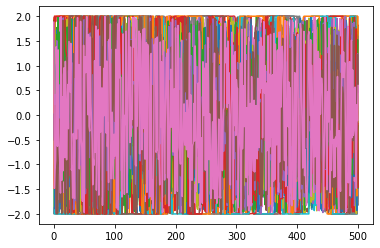

In [6]:
g = 0.5
kappa = 0.5
delta = np.linspace(4, 0, 15)

overlapStartValue = np.zeros((15,1))

overlapEndValue = np.zeros((15,1))

for j in range(len(delta)):
    #run opt
    targetState2 = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [0,0], g, kappa)
    targetMPS2 = targetState2.get_mps([pulse.ConstantPulse(0)])
    state2 = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [-delta[j]/2,delta[j]/2], g, kappa)
    delta2 = ppulse.DirectParameterizedPulse(20, 500, [-2, 2])
    plt.plot(delta2.state())
    optimize_overlap(state2, targetMPS2, delta2)
    plt.plot(delta2.state())

    #run precise overlap
    targetState2 = cavity_qed_systems.ModulatedTavisCumming(0.001, 20000, [0,0], g, kappa)
    targetMPS2 = targetState2.get_mps([pulse.ConstantPulse(0)])
    state2 = cavity_qed_systems.ModulatedTavisCumming(0.001, 20000, [-delta[j]/2,delta[j]/2], g, kappa)
    overlapStartValue[j] = (np.abs(state2.get_inner_product(targetMPS2, [pulse.ConstantPulse(0)]))**2)
    overlapEndValue[j] = (np.abs(state2.get_inner_product(targetMPS2, [delta2]))**2)
         

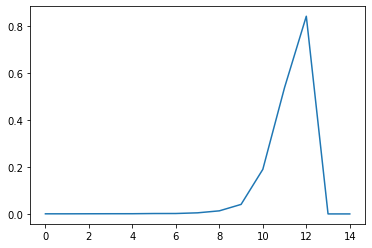

In [7]:
plt.plot(overlapStartValue)

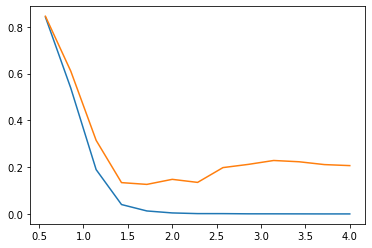

In [27]:
plt.plot(delta[0:-2], overlapStartValue[0:-2])
plt.plot(delta[0:-2], overlapEndValue[0:-2])

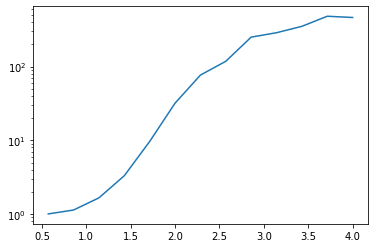

In [30]:
plt.plot(delta[0:-2], overlapEndValue[0:-2]/overlapStartValue[0:-2])
plt.yscale("log") 

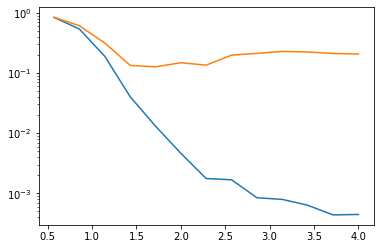

In [31]:
plt.plot(delta[0:-2], overlapStartValue[0:-2])
plt.plot(delta[0:-2], overlapEndValue[0:-2])
plt.yscale("log") 